## Long short-term memory artificial neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [2]:
training_set = pd.read_csv('./monthly-lake-erie-levels-1921-19.csv')
training_set = training_set.iloc[:,1:2].values

In [3]:
# Preprocessing data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [4]:
# Setting hyperparameters
seq_length = 7
learning_rate = 0.01
input_size = 1
hidden_size = 5
num_classes = 1
num_layers = 1
num_epochs = 400

x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.7)
test_size = len(y) - train_size
trainX = torch.Tensor(np.array(x[0:train_size]))
trainX = Variable(trainX)
testX = torch.Tensor(np.array(x[train_size:len(x)]))
testX = Variable(testX)
trainY = torch.Tensor(np.array(y[0:train_size]))
trainY = Variable(trainY)
testY = torch.Tensor(np.array(y[train_size:len(y)]))
testY = Variable(testY)

In [5]:
# Defining LSTM
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

In [6]:
# Training 
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.data[0]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


Epoch: 0, loss: 0.15300
Epoch: 1, loss: 0.13030
Epoch: 2, loss: 0.11052
Epoch: 3, loss: 0.09346
Epoch: 4, loss: 0.07897
Epoch: 5, loss: 0.06698
Epoch: 6, loss: 0.05748
Epoch: 7, loss: 0.05048
Epoch: 8, loss: 0.04599
Epoch: 9, loss: 0.04397
Epoch: 10, loss: 0.04411
Epoch: 11, loss: 0.04566
Epoch: 12, loss: 0.04764
Epoch: 13, loss: 0.04916
Epoch: 14, loss: 0.04971
Epoch: 15, loss: 0.04923
Epoch: 16, loss: 0.04795
Epoch: 17, loss: 0.04621
Epoch: 18, loss: 0.04433
Epoch: 19, loss: 0.04254
Epoch: 20, loss: 0.04098
Epoch: 21, loss: 0.03973
Epoch: 22, loss: 0.03878
Epoch: 23, loss: 0.03809
Epoch: 24, loss: 0.03760
Epoch: 25, loss: 0.03724
Epoch: 26, loss: 0.03695
Epoch: 27, loss: 0.03666
Epoch: 28, loss: 0.03630
Epoch: 29, loss: 0.03584
Epoch: 30, loss: 0.03523
Epoch: 31, loss: 0.03447
Epoch: 32, loss: 0.03355
Epoch: 33, loss: 0.03249
Epoch: 34, loss: 0.03134
Epoch: 35, loss: 0.03015
Epoch: 36, loss: 0.02897
Epoch: 37, loss: 0.02785
Epoch: 38, loss: 0.02685
Epoch: 39, loss: 0.02595
Epoch: 40,

Epoch: 348, loss: 0.00266
Epoch: 349, loss: 0.00266
Epoch: 350, loss: 0.00266
Epoch: 351, loss: 0.00266
Epoch: 352, loss: 0.00266
Epoch: 353, loss: 0.00266
Epoch: 354, loss: 0.00265
Epoch: 355, loss: 0.00265
Epoch: 356, loss: 0.00265
Epoch: 357, loss: 0.00265
Epoch: 358, loss: 0.00265
Epoch: 359, loss: 0.00265
Epoch: 360, loss: 0.00265
Epoch: 361, loss: 0.00265
Epoch: 362, loss: 0.00264
Epoch: 363, loss: 0.00264
Epoch: 364, loss: 0.00264
Epoch: 365, loss: 0.00264
Epoch: 366, loss: 0.00264
Epoch: 367, loss: 0.00264
Epoch: 368, loss: 0.00264
Epoch: 369, loss: 0.00264
Epoch: 370, loss: 0.00264
Epoch: 371, loss: 0.00263
Epoch: 372, loss: 0.00263
Epoch: 373, loss: 0.00263
Epoch: 374, loss: 0.00263
Epoch: 375, loss: 0.00263
Epoch: 376, loss: 0.00263
Epoch: 377, loss: 0.00263
Epoch: 378, loss: 0.00263
Epoch: 379, loss: 0.00263
Epoch: 380, loss: 0.00262
Epoch: 381, loss: 0.00262
Epoch: 382, loss: 0.00262
Epoch: 383, loss: 0.00262
Epoch: 384, loss: 0.00262
Epoch: 385, loss: 0.00262
Epoch: 386, 

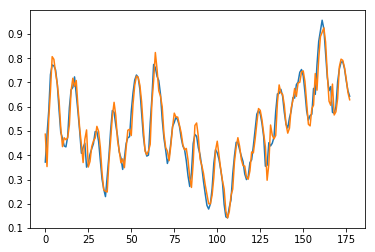

In [7]:
# Predictions
lstm.eval()
test_predict = lstm(testX)

test_predict = test_predict.data.numpy()
testY = testY.data.numpy()
plt.plot(testY)
plt.plot(test_predict)
plt.show()